# Practice Session 08: Connected components and k-core decomposition

In this session we will use [NetworkX](https://networkx.github.io/) to compute the number of connected components and the size of the largest connected component on a graph. We will use the [Star Wars graph](https://github.com/evelinag/StarWars-social-network/tree/master/networks).

The dataset is contained in this input file that you will find in our [data](https://github.com/chatox/networks-science-course/tree/master/practicum/data) directory:
* ``starwars.graphml``: co-occurence of characters in scenes in the Star Wars saga in [GraphML](http://graphml.graphdrawing.org/) format.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

# 1. The Star Wars graph

The following code just loads the *Star Wars* graph into variable *g*. Leave as-is.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [120]:
import io
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

In [121]:
INPUT_GRAPH_FILENAME = "starwars.graphml"

In [122]:
# Read the graph in GraphML format
g_in = nx.read_graphml(INPUT_GRAPH_FILENAME)

# Re-label the nodes so they use the 'name' as label
g_relabeled = nx.relabel.relabel_nodes(g_in, dict(g_raw.nodes(data='name')))

# Convert the graph to undirected
g = g_relabeled.to_undirected()

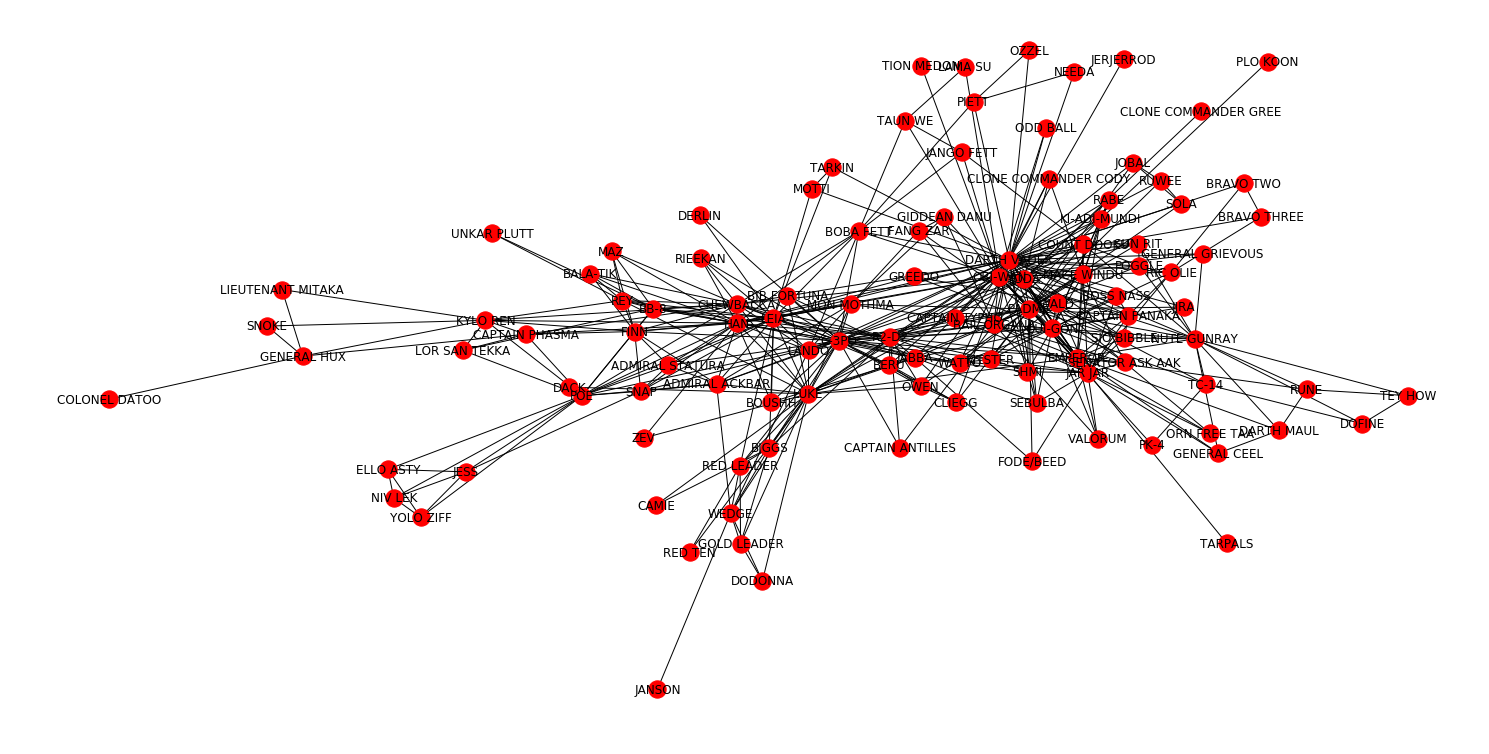

In [123]:
# Create a plot of 20x10
plt.figure(figsize=(20,10))

# Layout the nodes using a spring model
nx.draw_spring(g, with_labels=True)

# Display
_ = plt.show()

<font size="+1" color="red">Replace this cell with a brief commentary indicating the number of nodes (g.number_of_nodes()), edges (g.number_of_edges()), and connected components (by visual inspection) in the Star Wars graph.</font>

# 2. Removing a fraction of edges

The following function, `remove_fraction_edges(g, p)` returns a new graph which is a copy of *g* in which a fraction *p* of edges have been removed.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [124]:
def remove_fraction_edges(g_in, p):
    # Check input is within bounds
    if p < 0.0 or p > 1.0:
        raise ValueError
    
    # Create a copy of the input graph
    g_out = g_in.copy()
    
    # Decide how many edges should be in the output graph
    target_num_edges = int((1.0-p) * g_in.number_of_edges())

    # While there are more edges than desired
    while g_out.number_of_edges() > target_num_edges:
        
        # Remove one random edge
        edge = random.choice(list(g_out.edges()))
        g_out.remove_edge(edge[0], edge[1])
    
    # Return the resulting graph
    return g_out

Use `remove_fraction_edges(g, p)` to create three graphs named *g10*, *g50*, and *g90* that should contain 10%, 50%, and 90% of the edges in the original graph. Then, plot those three graphs.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to create g10, g50, g90 as described above, and to plot these three graphs.</font>

<font size="+1" color="red">Replace this cell with a brief commentary of what you observe in these three graphs with respect to the number of connected components, the number of singletons, and the size of the largest connected components.</font>

# 3. Number of connected components

Next, we will write some code to count the number of connected components.

This code will be structured around two functions: `assign_component` and `assign_component_recursive`.

The function `assign_component` takes as input a graph *g*, and returns a dictionary that maps every node in *g* to a positive integer indicating its connected component number. The `assign_component` function should do the following:

1. Create an empty dictionary `node2componentid`
1. Start with `componentid = 1`
1. Iterate through all the nodes in the graph: `for node in g.nodes()`
1. For each `node` that is not in the `node2componentid` dictionary (i.e., `if node not in node2componentid`), call `assign_component_recursive`, incrementing *componentid* by 1 in each call
1. Return the `node2componentid` dictionary.

The function `assign_component_recursive` takes the following arguments:

1. A graph *g*
1. A dictionary *node2componentid*
1. A starting node *starting_node*
1. A number *component_id*

The function should do the following:

1. Set `node2componentid[starting_node] = component_id`.
1. For each neighbor in `g.neighbors(starting_node)`, if that neighbor is not in the `node2componentid` dictionary, call the function `assign_recursive(g, node2componentid, neighbor, componentid)`. 

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code for "assign_component_recursive" and "assign_component".</font>

The code below returns the number of connected components. Leave as-is.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [151]:
def count_connected_components(g):
    # Call the function to assign each node to a connected component
    node2componentid = assign_component(g)
    
    # Count the number of distinct values in this assignment
    return len(set(node2componentid.values()))

The code below computes how many connected components are in graphs in which 0%, 2%, 4%, ..., 98% of the edges are removed. Leave as-is.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [152]:
components_per_fraction = {}

for p in np.arange(0.0, 1.02, 0.02):
    reduced_graph = remove_fraction_edges(g, p)
    connected_components = count_connected_components(reduced_graph)
    components_per_fraction[p] = connected_components

Create a plot in which in the x axis is the fraction of removed edges, and in the y axis the number of connected components as a fraction of the maximum number of connected components possible in the graph. Hence, both the x-axis and the y-axis should go from 0.0 to 1.0. Include labels in both axes. A basic plot is obtained as follows.

```python
x_vals = sorted(components_per_fraction.keys())
y_vals = [components_per_fraction[x]/g.number_of_nodes() for x in x_vals]
plt.plot(x_vals, y_vals, ...)
```

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to create the described graph.</font>

<font size="+1" color="red">Replace this cell with a brief commentary with what you observe on this graph. Do you see a linear trend, or something else?</font>

# 4. Largest connected component

Write a function `size_largest_connected_component` to compute the size of the largest connected component on a graph. Basically you need to call `assign_component` and then iterate through the nodes, counting how many times you see each *componentid*, and returning the maximum of this.

To obtain the maximum value on a dictionary, e.g., *component_sizes*, you can use `np.max(list(component_sizes.values()))`

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [153]:
def largest_connected_component(g):
    node2componentid = assign_component(g)
    component_sizes = {}
    for (node,componentid) in node2componentid.items():
        if componentid not in component_sizes:
            component_sizes[componentid] = 0
        component_sizes[componentid] += 1
    
    return np.max(list(component_sizes.values()))

<font size="+1" color="red">Replace this cell with code for "size_largest_connected_component".</font>

Next, use the `size_largest_connected_component` function to obtain data to create a plot. In this plot, in the x axis there should be the fraction of removed nodes and in the y axis the size of the largest connected component as a fraction of the total number of nodes. Both axis should go from 0.0 to 1.0; remember to label the axes.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to generate the requested graph.</font>

<font size="+1" color="red">Replace this cell with a brief commentary on what you observe on this graph. Do you see a linear trend? Is there an inflection point? How many edges do you need to remove for the largest connected component to be, say, 80% of the nodes?</font>

# 5. K-core decomposition

Now we will perform a k-core decomposition, using the following auxiliary functions, which you can leave as-is.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [154]:
def get_max_degree(g):
    degree_sequence = [x[1] for x in g.degree()]
    return(max(degree_sequence))


def nodes_with_degree_less_or_equal_than(g, degree):
    nodes = []
    for node in g.nodes():
        if g.degree(node) <= degree:
            nodes.append(node)
    return nodes

Complete the code for function `kcore_decomposition(g)`; to use this function, you do `node_to_kcore = kcore_decomposition(g)`.

```python
def kcore_decomposition(graph):
    ''' Perform a k-core decomposition of the given graph
    '''
    g = graph.copy()
    max_degree = get_max_degree(g)

    node_to_level = {}
    for level in range(1, max_degree + 1):

        while True:
            # Obtain the list of nodes with degree <= level
            nodes_in_level = nodes_with_degree_less_or_equal_than(g, level)

            # Check if this list is empty
            if len(nodes_in_level) == 0:
                # TO-DO: implement (one line)

            # If the list is not empty, assign the nodes to the
            # corresponding level and remove the node
            for node in nodes_in_level:
                # TO-DO: implement this (two lines)

    return(node_to_level)
```

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code for "kcore_decomposition"</font>

<font size="+1" color="red">Replace this cell with code to list the nodes in the deepest k-core in the graph, and in the second deepest k-core.</font>

<font size="+1" color="red">Replace this cell with a brief commentary on the type of characters you find in these k-cores.</font>

# Deliver (individually)

A .zip file containing:

* This notebook.


## Extra points available

For extra points and extra learning (+2, so your maximum grade can be a 12 in this assignment), note that in our graphs for the number of connected components and size of largest connected component, the line is not smooth. This is because there are random variations as the removal of edges is random every time. To fix this, you will need to repeat each experiment, e.g., 100 times, and plot the average line. For extra points, replace the graphs of number of connected components and size of largest connected component with an average of multiple experimental runs.

**Note:** if you go for the extra points, add ``<font size="+2" color="blue">Additional results: multiple experiments per graph</font>`` at the top of your notebook.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>